<a href="https://colab.research.google.com/github/caioschiefer-degree/Walsh/blob/main/ENews_Express_Full_Code_CMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Learner:
<font color=white>: **Caio Maluf Schiefer**

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Project 1:
<font color=white>: **Business Statistics**

    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submission Date:
<font color=white>: **3 August 2025**

    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> GitHub Address of this assignment
<font color=darkblue>:
    https://github.com/caioschiefer-degree/Walsh.git

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Google Colab URL of this assignment
<font color=darkblue>:
    https://drive.google.com/file/d/1fmKKlWyECQ0X7tsxvDxDPl_6hOgZ-zVl/view?usp=sharing

# Learner's considerations and background before we start

As this is my first project being submitted as part of the Walsh DBA Bridge Program and, as I have taken the AIML course in 2021 (when the submission process was a bit different), I just wanted to clarify what I will be doing in this notebook.

I am opting for a full code version at this point, as one of my aims is to increase my own proficiency in Python.

Some of the code I will be using throughout this notebook are leveraged from previously submitted notebooks from AIML (back from my 2021 notes). Such codes may contain snippets from shared notebooks from Great Learning instructors over the period. When that is the case, I will ensure there are comments mentioning this. I'll also explain how the code works, even in such cases where code is being reused.

This notebook is being worked and saved in Dark Mode using Google Colab in Microsoft Edge Version 138.0.3351.95 (Official build) (64-bit) in case of incomatibility.

# <a id = "link1"></a>Context and Problem Statement


## Define Problem Statement and Objectives

The text below has been imported from Great Learning Problem Statement page and will serve as the key reference for what we intend to do throught this exercise.

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?

#Starting with the Code

## Import all the necessary libraries

The snippet below has been suggested in the original low code notebook provided.
However, during the execution of the notebook, I did not feel the need to change or updgrade the versions below.

I am keeping the code commented out for reference.

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

Importing the libraries without specifying their versions:

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

I will print out the versions of the imported libraries below. All are newer versions than the ones suggested above, so I'm going with them.

In [3]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


## Reading the Data into a DataFrame

Mounting the drive requires permission to access your Google Drive.

Every time it is executed, a pop window shows up, and you have to give consent for access.
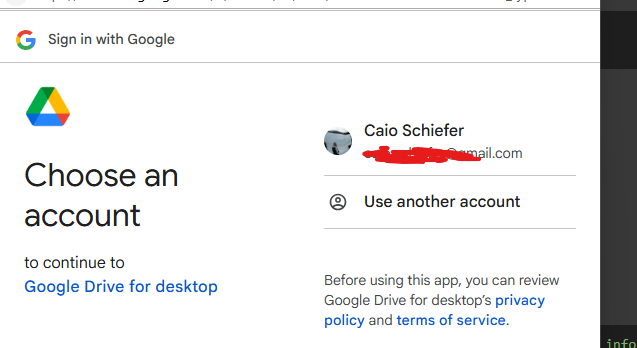

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading from CSV file
# Even though the drive is mounted at /content/drive, it is still requiring the full path for reading.
df = pd.read_csv('/content/drive/MyDrive/Walsh/1 - Stats/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

The below are the requests:

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

I usually work with a ultra-wide screen and found the below code snipped very useful as it wide-expands to 70% of the screen.

Otherwise the dataframes, tables and plots are only displayed within a confined area on the screen.

I may choose to comment it out when exporting this notebook to HTML, but I did use it when working this assignment.

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
display(HTML("<style>.output_result { max-width:70% !important; }</style>"))
#display(HTML("<style>.prompt { display:none !important; }</style>"))

Checking the first few records

In [7]:
# Default is top 5 rows, but I see some value in seeing more. Going for 10 here.
df.head(10)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
5,546558,control,old,5.28,yes,English
6,546448,treatment,new,5.25,yes,French
7,546581,control,old,6.53,yes,Spanish
8,546461,treatment,new,10.71,yes,French
9,546548,control,old,2.08,no,English


Structure matches the data dictionay.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

In [8]:
#Checking the data type of each column as well as whether or not we have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
#We have the information above that there's no null values. But the code below gives a better view of the same information.
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


Fortuntely we have no null values, so there's no need for any actions here.

User ID may not be a relevant field, as it doesn't seem to contain business value in it. I'll soon check uniqueness and other attributes.

Most fields seem to be categorical. Only "Time Spent on Page" is numerical and continuous.

Even though there is only 1 numberical feature, let me break the dataframe into the numerical and categorical features for 1) clarity and adaptability of the process and 2) differentiate them in their analysis.

In [10]:
numeric_cols=['time_spent_on_the_page']

category_cols=['group',
'landing_page',
'converted',
'language_preferred']

And also let me check the number of unique values in each column, categorical and numerical.

In [11]:
df.nunique()

,0
user_id,100
group,2
landing_page,2
time_spent_on_the_page,94
converted,2
language_preferred,3


As expected:
- Only 2 groups
- Only 2 values for landing page
- Only 2 values for Converted
- 3 languages
- Barely no exact repeat of the time spent on the page.

I will list them as part of the univariate analysis in the next section

### Univariate Analysis

Let's start with the only numerical column

In [12]:
df[numeric_cols].describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


* 5.38 minutes is the mean amount of time a user spent on the webpage, irrespective the landing page.
* 10.7 minutes is the maximum amount of time an user spent on the page.

We'll see more details of this distribution below.

The Function Below was taken out of **"Case_Study - Bike_Sharing"** Jupyter Notebook in AIML 2021.

It is an extreme useful function for univariate analysis of numerical features.

In [13]:
def histogram_boxplot(feature, figsize=(6,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient='h') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

Now we look all the numeric features through this function.
In our example here, only one pair of box plot/histogram will be displayed.

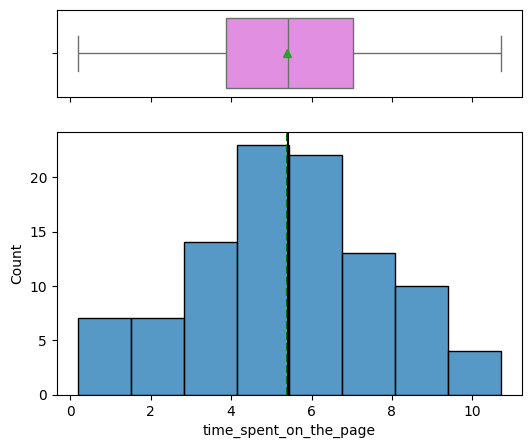

----------------------------------------------------------------------------------------------------


In [14]:
for column in numeric_cols:
    histogram_boxplot(df[column])
    plt.show()
    print('-'*100)

At first glance, this is approaches a normal distribution. No outliers can be found on the boxplot as such.

Let's continue the analysis with the categorical features.

In [15]:
for column in category_cols:
    print(df[column].value_counts().sort_values(ascending=False))
    print('-'*30)

group
control      50
treatment    50
Name: count, dtype: int64
------------------------------
landing_page
old    50
new    50
Name: count, dtype: int64
------------------------------
converted
yes    54
no     46
Name: count, dtype: int64
------------------------------
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64
------------------------------


The distribution here seems very precise too:
- 50% of control/treatment under group
- 50% of old/new under landing page
- 54%/46% for converted
- And the three languages (Spanish, French and English) almost equally distributed.

We can also easily see this visually below.

The following function has also been taken out of **"Case_Study - Bike_Sharing"** Jupyter Notebook in AIML 2021.

Originally it had the pallete set as "Paired", but a warning message says this is a deprecated feature now. This issue is solved by adding hue=z (the input parameter).



In [16]:
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(6,4))
    ax = sns.countplot(df,x=z,palette="winter",hue=z)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()    -20    # hieght of the plot

        ax.annotate(percentage, (x, y), size = 10) # annotate the percantage
    plt.show() # show the plot

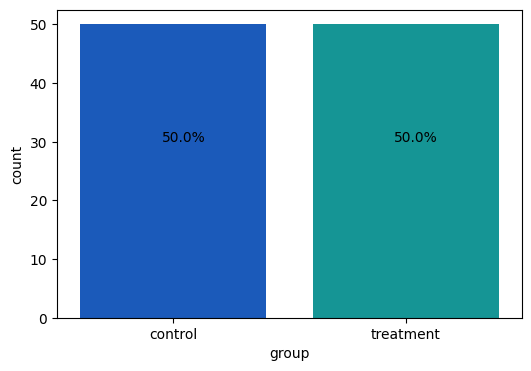

                              
                              
----------------------------------------------------------------------
                              
                              


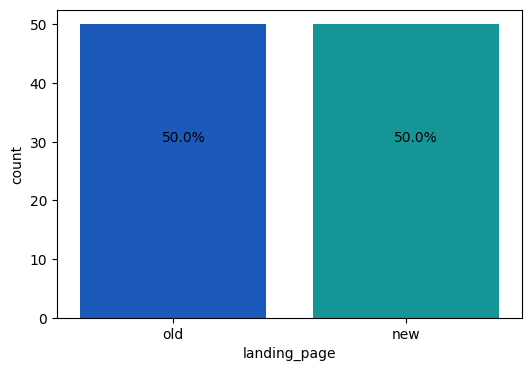

                              
                              
----------------------------------------------------------------------
                              
                              


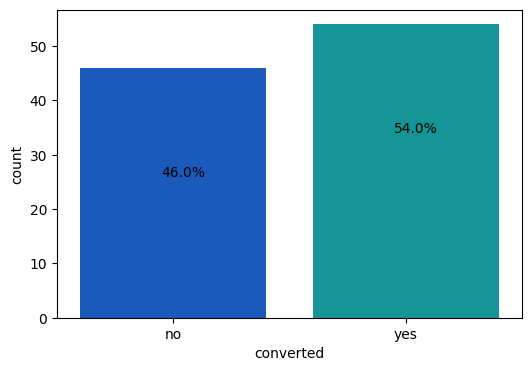

                              
                              
----------------------------------------------------------------------
                              
                              


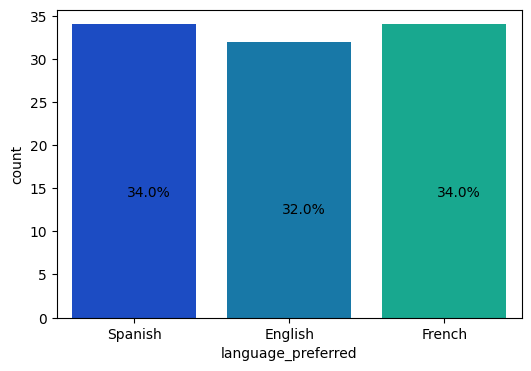

                              
                              
----------------------------------------------------------------------
                              
                              


In [17]:
for column in category_cols:
    perc_on_bar(column)
    #the below is to create some space between the plots for better visibility
    print(" "*30)
    print(" "*30)
    print("-"*70)
    print(" "*30)
    print(" "*30)

Data quality is really good here, with no incorrect values, no null values, no issues with percentages of values, etc.

But before we proceed, from the data dictionary and problem statement, there is an indication that records where the landing page is new is the treatment group. And the record where the page is the old version is the control group.

Let's just validate if this is the case before we proceed, to guarantee consistency and that we properly understood the data.

In [18]:
#unique values for landing page, when group is new
print(df[df['landing_page']=='new']['group'].unique())

['treatment']


In [19]:
#unique values for landing page, when group is old
print(df[df['landing_page']=='old']['group'].unique())

['control']


The understanding is correct. Both columns, for the intents and pursposes of this analysis, reveal the same information.

Let's see how the features related to each other now on the Bivariate Analysis.

### Bivariate Analysis

Firstly, let have a look at the categorical variables against the conversion rate.

Stacked Plot Analysis. The function below was taken out of **"OnlineShoppersPurchasing_Intention-1"** Jupyter Notebook from AIML 2021 with adjustments on the target variable name.

The idea is to have a visual representation on how the target variable - converted - is affected (or not) by the other categorical variables.

In [20]:
def stacked_plot(x):
    sns.set(palette='Spectral')
    tab1 = pd.crosstab(x,df['converted'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['converted'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(6,4))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

converted  no  yes  All
group                  
control    29   21   50
treatment  17   33   50
All        46   54  100
------------------------------------------------------------------------------------------------------------------------


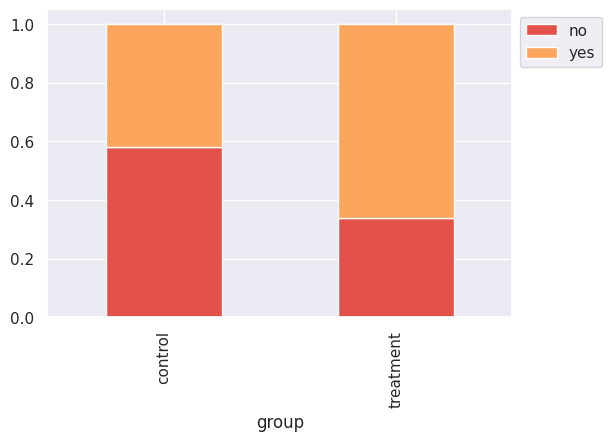

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
converted     no  yes  All
landing_page              
new           17   33   50
old           29   21   50
All           46   54  100
------------------------------------------------------------------------------------------------------------------------


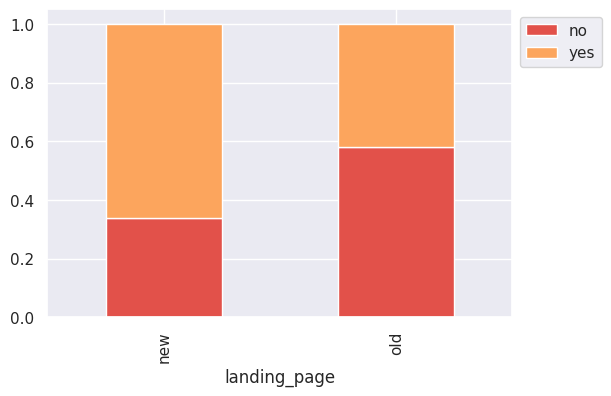

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
converted  no  yes  All
converted              
no         46    0   46
yes         0   54   54
All        46   54  100
------------------------------------------------------------------------------------------------------------------------


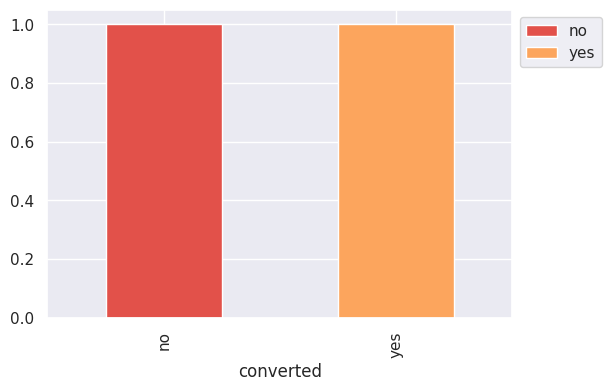

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100
------------------------------------------------------------------------------------------------------------------------


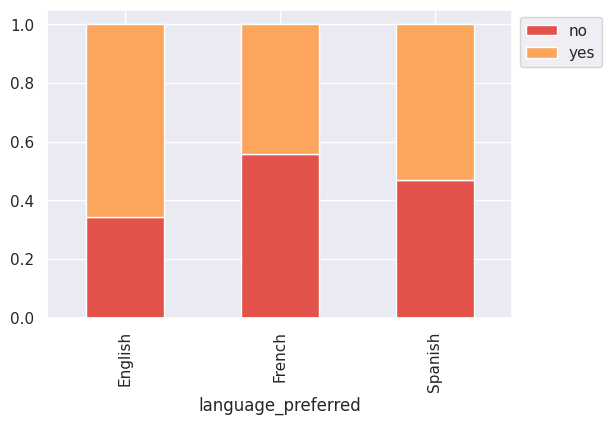

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [21]:
for column in category_cols:
    stacked_plot(df[column])
    print('-'*100)
    print('-'*100)
    print('-'*100)

Some observations from the visual plots (that will be validated, or not, further down, with the appropriate statistical tests).

It looks like (again, to be validated further down):


*   The treatment group had a higher conversion rate (to what degree, we'll see below)
*   The changes on the landing page impacted the conversion rate.
*   English speakers seem to have a higher conversion rate. All to be validated.



Now let's check how the numerical variables behaves against the conversion rate.

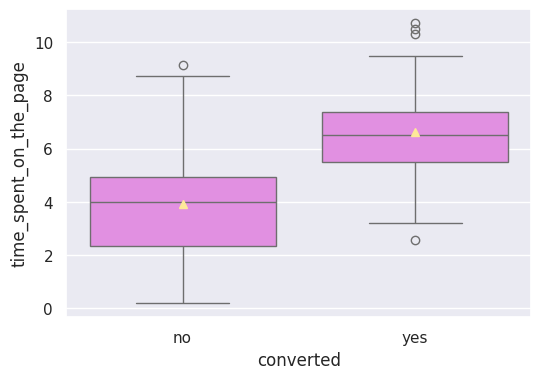

In [22]:
# Firstly on a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x = 'converted', y = 'time_spent_on_the_page', data = df,showmeans=True, color='violet', orient='v')
plt.show()

Then on a histplot

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

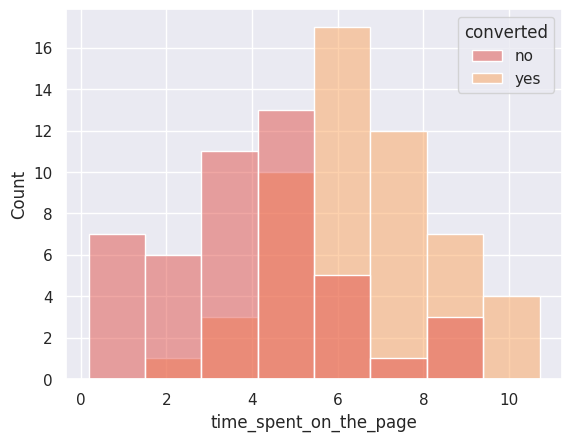

In [23]:
sns.histplot(data=df, x='time_spent_on_the_page', hue='converted')

It does insinuate the more time an user spends on a page, the more likely it is to subscribe.

Let's see if the behaviour is replicated irrespective of which page they spend time on.

First on the new pages.

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

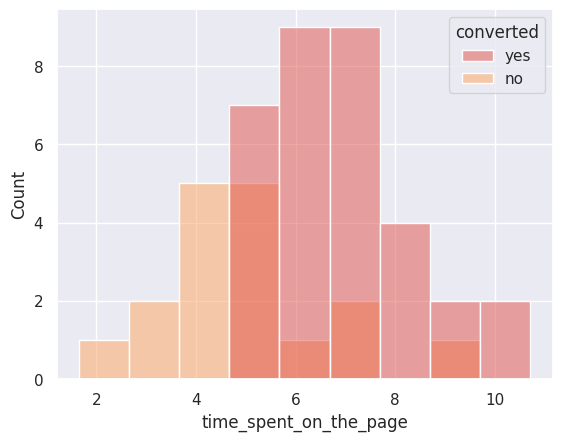

In [24]:
sns.histplot(data=df[df['landing_page']=='new'], x='time_spent_on_the_page', hue='converted')

It does insinuate that users who spent more time on the new page, are more likely to subscribe. And it suggests more of a normal distribution as well. We will validate all these assumptions in due course.

Let's see the behaviour only on the old page now:

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

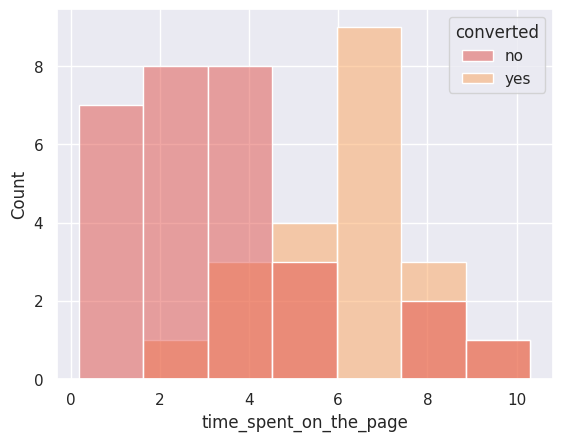

In [25]:
sns.histplot(data=df[df['landing_page']=='old'], x='time_spent_on_the_page', hue='converted')

This is an interesting visual finding. While whoever spends more time on the old page seems to be more likely to subscribe, it does appear that users don't spend much time at all in the old page. We'll see if this is indeed the case in statistical terms.

### Summary of the findings on Univariate and Bivariate Analysis

We started the Exploratory Data Analysis by noting that:

-	Dataset has a high data quality, with no missing data in any of the columns available for us.
-	Additionally, we confirmed the unique values in each column are exactly what we expected to see, with no spelling mistakes, etc. It also showed a proper split of records among group, landing pages, preferred language and converted.
-	It also showed that almost the entirety of time spent on page is unique.

On the univariate analysis:

For the numeric variable (time spent on page):
-	It does appear the distribution is normal, with no outliers, as visualised in both the histogram and the box plot.

For the categorical columns:
-	We validated the proper split within the data set.
-	We validated that columns ‘landing page’ and ‘group’ are indeed similar, as implied in the problem statement.

On the bivariate analysis:

For the numerical variable:
-	Against the ‘converted’ column, there seems to be the case that the more time you spend on a page, the likely it is for a user to subscribe to the news.
-	We also split the analysis across old and new pages, finding:
o	An initial indication that users who spent more time on the new page are more likely to subscribe
o	An initial indication users don’t spend much time in the old page in the first place, but the ones who do are also more likely to subscribe.

For the categorical columns:
-	An initial indication that people on the treatment group are more likely to subscribe. That also then implies the same for people who are assigned the new page are more likely to subscribe.
-	There seems to be a more tenue indication that English speaker users are more likely to subscribe than Spanish and French speakers.


#Starting to answer the targeted questions

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

The boxplot was suggested in the low code notebook, let's see what it looks like:

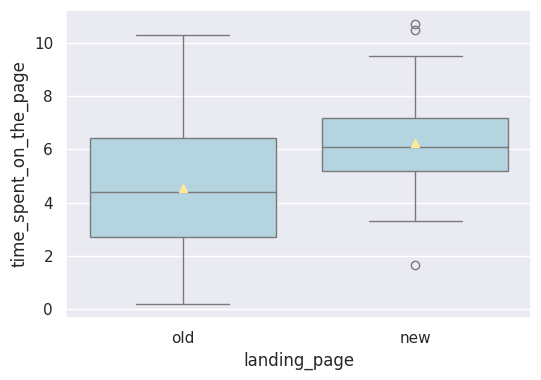

In [26]:
# Firstly on a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df,showmeans=True, color='lightblue', orient='v')
plt.show()

I personally like the histplot with the hue on the variable we want to assess (landing page, in this case).

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

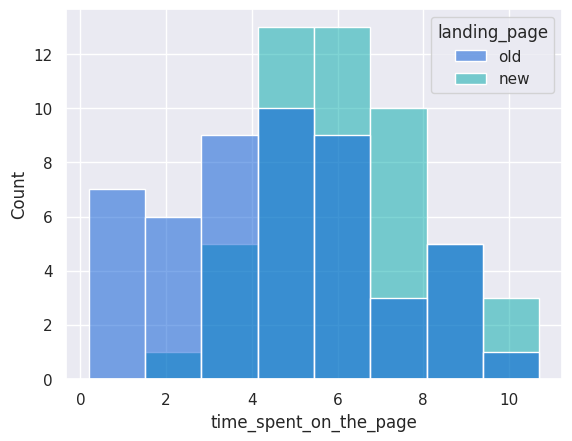

In [27]:
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', palette='winter')

There seems to be an indication that users spend more time on the new page. We also saw this suggestion when doing the bivariate analysis for conversion rate on the new page. It's time to assess if the visual clues we're getting are statistically relevant or not.

### Step 1: Define the null and alternate hypotheses

Time to frame the null and alternate hypothesis:

> $H_0:$ The mean time spent on the website is less than or equal in the old website version than the newer. Current website version is the status quo <br>

> $H_a:$ The mean time spent on the newer version of the website is larger than the old..

Let $\mu_1, \mu_2$ be the time spent mean on old and new website versions.

Mathematically, the above formulated hypotheses can be written as

>$H_0: \mu_1 \le \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

Assumptions:

* About the population: Unknown population mean and standard deviation
* Normality: We can assume normality. Please refer to the very first univariate we have done for time spent; and in question 4 we'll run the actual testing for evidence.
* Central Limit Theorem can be assumed based on the number of observations

Let's just have also a quick look at the mean value and standard deviation

In [28]:
print('The mean time spent on old version is ' + str(round(df['time_spent_on_the_page'][df['landing_page']=='old'].mean(),2)))
print('The mean time spent on new version is ' + str(round(df['time_spent_on_the_page'][df['landing_page']=='new'].mean(),2)))
print('The standard deviation of time spent in new version is ' + str(round(df['time_spent_on_the_page'][df['landing_page']=='old'].std(),2)))
print('The standard deviation of time spent in old version is ' + str(round(df['time_spent_on_the_page'][df['landing_page']=='new'].std(),2)))

The mean time spent on old version is 4.53
The mean time spent on new version is 6.22
The standard deviation of time spent in new version is 2.58
The standard deviation of time spent in old version is 1.82


### Step 2: Select Appropriate test

With the above assumption, values of means and standard deviation for the samples and with the goal of comparing mean time spent between two independent groups (old vs. new webpage), we are going with **Independent T test**

### Step 3: Decide the significance level

Significance level of 5% is set at problem statement.

In [29]:
alpha=0.05

### Step 4: Collect and prepare data

In [30]:
time_old_page =df['time_spent_on_the_page'][df['landing_page']=='old']
time_new_page =df['time_spent_on_the_page'][df['landing_page']=='new']

### Step 5: Calculate the p-value

In [31]:
from scipy.stats import ttest_ind

# Run the independent samples t-test
t_stat, p_value = ttest_ind(time_new_page, time_old_page, equal_var = True, alternative = 'greater')

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 3.7867702694199856
p-value: 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

Code snippet below adjusted from the Low code notebook provided.

In [32]:
# print the conclusion based on p-value
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Rejecting the null hypothesis here means there's statistical evidence users spend more time in the newer version of the landing page. This is supported by the visuals above as well.

This may suggest the new landing page is not only more appealing but, because spend more time on the website as whole, there may be a better navigation flow and interesting news may be better placed in the landing page, increasing engagement with the website.

Whether or not this has an impact on the conversion to subscriber rate, we'll see next.

**A similar approach will be followed to answer the other questions, starting with the visuals, then the same 7 steps**



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

Let's start repeating the visual above for the two categorical variables, landing page and converted users, reusing the *stacked_plot* function created earlier in this notebook:

converted     no  yes  All
landing_page              
new           17   33   50
old           29   21   50
All           46   54  100
------------------------------------------------------------------------------------------------------------------------


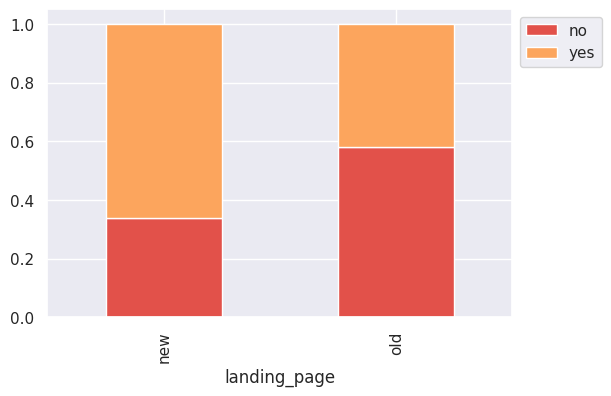

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [33]:
stacked_plot(df['landing_page'])
print('-'*100)
print('-'*100)
print('-'*100)

As we mentioned earlier in this notebook, this visual suggests that users who test the new webpage version are more likely to subscribe. We'll validate that.

### Step 1: Define the null and alternate hyphotesis

We want to check the impact of one categorical variable on another categorical variable:

$H_0:$ Web page design and subscription are independent of each other

$H_a:$ Web page design and subscription are independent of each other

### Step 2: Select the appropriate test

 We want to test if there is a statistically significant association between the page version shown and whether the user converted.

 This seems to be an application of the **Chi-square test** for a 2×2 contingency table.

### Step 3: Decide the significance level

Similarly to question number 1, the significance level is given at problem statement and set at 5%.

In [34]:
alpha=0.05

###Step 4: Collect and prepare the data

Creating a contingency table:

In [35]:
contingency_table = pd.crosstab(df['landing_page'], df['converted'])
contingency_table

converted,no,yes
landing_page,,
new,17,33
old,29,21


###Step 5: Calculate the p-value

Using the chi2_contingency function

In [36]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 4.871175523349437
p-value = 0.02730889175492232
Degrees of freedom = 1
Expected frequencies 
 [[23. 27.]
 [23. 27.]]


###Step 6: Compare the p-value with alpha

In [37]:
# print the conclusion based on p-value
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.02730889175492232 is less than the level of significance, we reject the null hypothesis.


###Step 7: Draw inference

Rejecting the null hypothesis means there is a dependency between which landing page the users are given to surf and the number of users becoming subscribers.

This is, again, in line with the visuals, where the "orange" stacks in the stack plots are indeed different.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

Let's start repeating the visual above for the two categorical variables, this time: language preferred and converted users:

converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100
------------------------------------------------------------------------------------------------------------------------


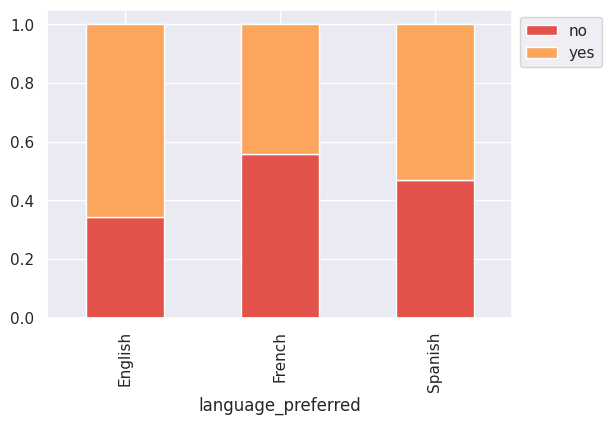

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [38]:
stacked_plot(df['language_preferred'])
print('-'*100)
print('-'*100)
print('-'*100)

As we mentioned earlier in this notebook, this visual suggests a slightly difference in conversion rates for the English language, but we will verify if this is statistically relevant or not.

### Step 1: Define the null and alternate hyphotesis

We will test the null hypothesis that conversion rate is independed on preferred language:

>$H_0: $ The conversion rate is independent on the preferred language.

against the alternative hypothesis

>$H_a: $ The conversion rate is dependent on the preferred language.

### Step 2: Select the appropriate test

 We want to test if there is a statistically significant association between the preferred language and whether the user converted.

 These are still 2 categorical variables, hence suggesting once again an application of the **Chi-square test**, but this time for a **3×2 contingency table.**

### Step 3: Decide the significance level

Similarly to question number 1 and 2, the significance level is given at problem statement and set at 5%.

In [39]:
alpha=0.05

###Step 4: Collect and prepare the data

Creating the 3x2 contingency table with crosstab function once more:

In [40]:
language_contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
language_contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


###Step 5: Calculate the p-value

Once more using the *chi2_contingency* function

In [41]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(language_contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370832
p-value = 0.2129888748754345
Degrees of freedom = 2
Expected frequencies 
 [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


###Step 6: Compare the p-value with alpha

In [42]:
# print the conclusion based on p-value
if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw inference

This time we failed to reject the null hypothesis, meaning we can assume the preferred language has no significant statistical impact on the number of users who become subscriber.

If we had only the EDA to go by, I'd have said English speakers would have a higher level of conversion than Spanish and French. But there's no statistical data to support that is what we learned here.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

Let's firstly repeat the two plots from question 1: boxplot and histplot

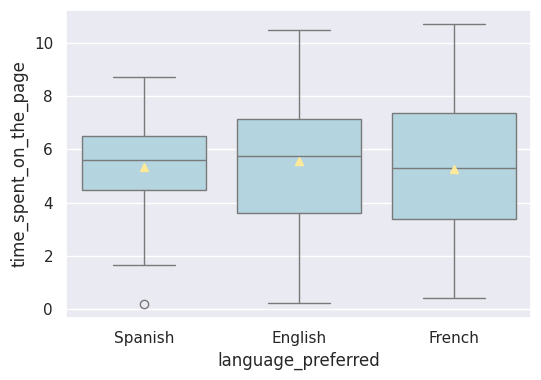

In [43]:
# Firstly on a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df,showmeans=True, color='lightblue', orient='v')
plt.show()

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

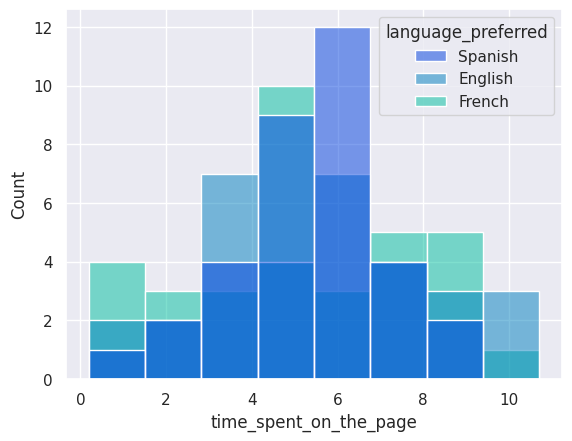

In [44]:
sns.histplot(data=df, x='time_spent_on_the_page', hue='language_preferred', palette='winter')

At first glance, there doesn't seem to be - at least visually - a clear difference on time spent on page and preferred language.

In the boxplot we can see the means are very close, with Spanish having a clear outlier, but nothing significantly that caught our eyes. We'll see if they are statistically relant though.

### Step 1: Define the null and alternate hyphotesis

Let $\mu_1, \mu_2, \mu_3$ be the means for time spent on page for English, Spanish and French.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least for one of the three languages, the time spent on page statistically differs.


### Step 2: Select the appropriate test

We have one continuous variable (i.e time on page) to be compared against the 3 preferred languages. **One-way ANOVA** seems to be appropriate here, as long as the normality and equality of variance assumptions are valid.

* Let's use Shapiro-Wilk’s test for the checkign of normality.
* And Levene test for equality of variance.

In [45]:
from scipy.stats import shapiro

# find the p-value for the time distribution as whole
w, p_value = shapiro(df['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5642956935237358


For the time distribution as a whole, we can assume normality of the distribution as the p-value (0.56) is larger than alpha, hence failing to reject the null hypothesis the distribution is normal.

Let's now see if we can assume normality within each of the 3 languages as well.

In [46]:
w, p_value = shapiro(df['time_spent_on_the_page'][df['language_preferred']=='English'])
print('The p-value for English is', p_value)

w, p_value = shapiro(df['time_spent_on_the_page'][df['language_preferred']=='Spanish'])
print('The p-value for Spanish is', p_value)

w, p_value = shapiro(df['time_spent_on_the_page'][df['language_preferred']=='French'])
print('The p-value for French is', p_value)

The p-value for English is 0.8690972103974174
The p-value for Spanish is 0.20207793105243776
The p-value for French is 0.6511558695519509


In all 3 cases, the p-value is way larger than alpha, once again failing to reject the null hyphotesis that the distributions are normal.

Let's now check the equality of variance.

In [47]:
from scipy.stats import levene
statistic, p_value = levene(df['time_spent_on_the_page'][df['language_preferred']=='English'],
                            df['time_spent_on_the_page'][df['language_preferred']=='Spanish'],
                            df['time_spent_on_the_page'][df['language_preferred']=='French'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


The p-value is only slightly higher than alpha, but still high enough for us to fail to reject the null hyphotesis and hence assume equality of variances as well.

### Step 3: Decide the significance level

Similarly to the 3 questions above, the significance level is given at problem statement and set at 5%.

In [48]:
alpha=0.05

###Step 4: Collect and prepare the data

In [49]:
english = df['time_spent_on_the_page'][df['language_preferred']=='English']
french  = df['time_spent_on_the_page'][df['language_preferred']=='French']
spanish = df['time_spent_on_the_page'][df['language_preferred']=='Spanish']

###Step 5: Calculate the p-value

Using the *f_oneway* function

In [50]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value_anova = f_oneway(df.loc[df['language_preferred']=='English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred']=='French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred']=='Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value_anova))

The p-value is 0.8665610536012648


###Step 6: Compare the p-value with alpha

In [51]:
# print the conclusion based on p-value
if p_value_anova < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06515086840327314 is greater than the level of significance, we fail to reject the null hypothesis.


###Step 7: Draw inference

We also fail to reject the null hypothesis here, meaning there's no statistical difference in the time users spend on the website and which are their preferred language.

This is also in line with visuals, which didn't play a trick on me this time around.

# <a id = "lastlink"></a>  Conclusion and Business Recommendations


This is a very interesting use case. The following is a business lens on top what needs to happen next:

* The new landing page clearly worked. Not only users spend more time on the new one, but it also boost the number of subscribers.

With that in mind, it's important to dig deep on what actually worked on the new design. It seems a focus on UI design and usability will be important for E-News.

* Preferred language is not a real factor in engagement and subscription.

While it made sense to asses how comfortable users would be with news in their preferred language, that didn't boost engagement and subscription levels. E-News should focus on content rather than localised languages.

I would recommend to go-live with the new website and, from them, try to analyse in more details metrics such as:

- Device their using (mobile, laptop, etc) and see if that also plays a factor or not.
- Type of content that is driving engagement. Map a bit deeper what people who are spending more time on the website read and whether or not that leads to more subscriptions too.
- Check if the time spent on the website is on actual read of the news or scrolling. This can help on better UI design, site stability, etc.

___